<a href="https://colab.research.google.com/github/Sanja2000/Customer-Relationship/blob/main/Customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER PERSONALITY ANALYSIS**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Displaying the Dataset

In [ ]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/marketing_campaign.csv',sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Getting the information about the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Displaying all the columns of the Dataset

In [ ]:
df_coulmns = list(df.columns)
df_coulmns

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

Checking the no of unique values of each columns

In [ ]:
for i in df_coulmns:
    print(f"category {i} has :", df[i].nunique(), "unique values.")

category ID has : 2240 unique values.
category Year_Birth has : 59 unique values.
category Education has : 5 unique values.
category Marital_Status has : 8 unique values.
category Income has : 1974 unique values.
category Kidhome has : 3 unique values.
category Teenhome has : 3 unique values.
category Dt_Customer has : 663 unique values.
category Recency has : 100 unique values.
category MntWines has : 776 unique values.
category MntFruits has : 158 unique values.
category MntMeatProducts has : 558 unique values.
category MntFishProducts has : 182 unique values.
category MntSweetProducts has : 177 unique values.
category MntGoldProds has : 213 unique values.
category NumDealsPurchases has : 15 unique values.
category NumWebPurchases has : 15 unique values.
category NumCatalogPurchases has : 14 unique values.
category NumStorePurchases has : 14 unique values.
category NumWebVisitsMonth has : 16 unique values.
category AcceptedCmp3 has : 2 unique values.
category AcceptedCmp4 has : 2 uni

We will assume that the customer information was collected 2014

In [ ]:
df['Age'] = 2014 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33


Dropping the year_Birth column which is of no use

In [ ]:
df = df.drop("Year_Birth", axis=1)

Checking the no of values for the education column

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In the Education column Changing the Graduation as ug, changing Master as pg, changing 2n cycle as ug, changing phd as pg, changing basic as ug.

In [ ]:
dict1 = {'Graduation':'UG', 'Master':'PG', '2n Cycle':'UG', 'PhD': 'PG', 'Basic':'UG'}

In the martial_status column changing the Married as togrther, changing divorced as single, changing widow as single, changing alone as single, changing absurd as single, changing yolo as single.

In [ ]:
dict2= {'Married':'Together', 'Divorced':'Single','Widow': 'Single','Alone':'Single', 'Absurd':'Single','YOLO':'Single'}

Applying all the changes to the martial_status column

In [ ]:
df['Marital_Status']= df['Marital_Status'].replace(dict2)

Applying all the changes to the Education column

In [ ]:
df['Education'] = df['Education'].replace(dict1)

Checking the number of null values in the dataset

In [ ]:
df.isnull().sum()

ID                      0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

Replacing the Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN,
                        strategy ='mean')
                    
imputer = imputer.fit(df[['Income']])
df['Income'] = imputer.transform(df[['Income']])
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,UG,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,2174,UG,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,4141,UG,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49
3,6182,UG,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,5324,PG,Together,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,UG,Together,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47
2236,4001,PG,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68
2237,7270,UG,Single,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33
2238,8235,PG,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58


Now again checking for the null values

In [ ]:
df.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

We are adding the kidhome and teenhome column and making it as a single column named Children_home

In [ ]:
df['Childern_home'] = df['Kidhome']+df['Teenhome']
df = df.drop(['Kidhome','Teenhome'], axis=1)
df.shape

(2240, 28)

Visualizing the made changes

In [ ]:
df.head(5)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Childern_home
0,5524,UG,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,0
1,2174,UG,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2
2,4141,UG,Together,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,0
3,6182,UG,Together,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1
4,5324,PG,Together,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1


Checking the number of values in the Children_home column

In [ ]:
df['Childern_home'].value_counts()

1    1128
0     638
2     421
3      53
Name: Childern_home, dtype: int64

Lets Highlight the age and time that a person is a client.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

Adding the MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts & MntGoldProds columns and making it into a single column named Total_spend.

In [ ]:
df["Total_spend"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

Renaming the columns

In [ ]:
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Childern_home,Total_spend
0,5524,UG,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,0,1617
1,2174,UG,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,27
2,4141,UG,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,0,776
3,6182,UG,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,53
4,5324,PG,Together,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,UG,Together,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47,1,1341
2236,4001,PG,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68,3,444
2237,7270,UG,Single,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,0,1241
2238,8235,PG,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,1,843


Displaying the no of days after  2014-06-29

In [ ]:
datelist = []
for i in df["Dt_Customer"]:
    datelist.append(i.date())

duration_list = []
for i in df["Dt_Customer"]:
    duration_list.append(max(datelist) - i.date())
print(max(datelist))   
df["dayscustomerfor"] = duration_list
df['dayscustomerfor']

2014-06-29


0      663 days
1      113 days
2      312 days
3      139 days
4      161 days
         ...   
2235   381 days
2236    19 days
2237   155 days
2238   156 days
2239   622 days
Name: dayscustomerfor, Length: 2240, dtype: timedelta64[ns]

Using the lambda function and replacing 

In [ ]:
df["dayscustomerfor"] = df["dayscustomerfor"].apply(lambda x: int(str(x).split(" ")[0]))
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Childern_home,Total_spend,dayscustomerfor
0,5524,UG,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,0,1617,663
1,2174,UG,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,27,113
2,4141,UG,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,0,776,312
3,6182,UG,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,53,139
4,5324,PG,Together,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,422,161


we display the New and Old value counts

In [ ]:
masknew = df["dayscustomerfor"] <= df["dayscustomerfor"].quantile(0.3)
maskold = df["dayscustomerfor"] > df["dayscustomerfor"].quantile(0.3)
df.loc[masknew, "Cust_Seniority"] = "New"
df.loc[maskold, "Cust_Seniority"] = "Old"
df["Cust_Seniority"].value_counts() 

Old    1566
New     674
Name: Cust_Seniority, dtype: int64

we  cahnging the 0 as no child 1 as two children 2 as two children 3 as 3 children

In [ ]:
dict3 = {0:'No Child', 1: 'One Child', 2:'two_Children', 3:'3_Children'}

Adding the Accepted cmp1,2,3,4,5 and response and making it as a single column named Total_Campaigns_accepted.

In [ ]:
df["Total_campaigns_accepted"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df["Response"]

Applying the lambda function to the Martial_status column

In [ ]:
df["Couple"] = df["Marital_Status"].apply(lambda x: 1 if x == "Together"  else 0)

Dropping all the  useless columns

In [ ]:
to_drop = ['ID','Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'dayscustomerfor']
df.drop(to_drop, axis=1, inplace=True)

Displaying the changed dataset

In [ ]:
df.head()

,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Childern_home,Total_spend,Cust_Seniority,Total_campaigns_accepted,Couple
0,UG,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,3,11,57,0,1617,Old,1,0
1,UG,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,3,11,60,2,27,New,0,0
2,UG,Together,71613.0,426,49,127,111,21,42,1,8,2,10,4,3,11,49,0,776,Old,0,1
3,UG,Together,26646.0,11,4,20,10,3,5,2,2,0,4,6,3,11,30,1,53,New,0,1
4,PG,Together,58293.0,173,43,118,46,27,15,5,5,3,6,5,3,11,33,1,422,New,0,1


Visualizing the shape of the dataset

In [ ]:
df.shape

(2240, 22)

Grouping the Education column and comparing it to the Total_spend column

In [ ]:
df.groupby("Education")["Total_spend"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
PG,856.0,646.20,619.64,8.0,86.75,425.5,1092.00,2525.0
UG,1384.0,580.81,590.08,5.0,64.00,340.0,1008.25,2524.0


Grouping the Education column and comparing it to the Income column

In [ ]:
df.groupby("Education")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
PG,856.0,54723.44,20350.16,4023.0,38942.50,53565.0,68131.50,162397.0
UG,1384.0,50715.73,27436.04,1730.0,31922.75,50059.0,68358.75,666666.0


Importing the seaborn and matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**EDA**

Visualizing the Income column

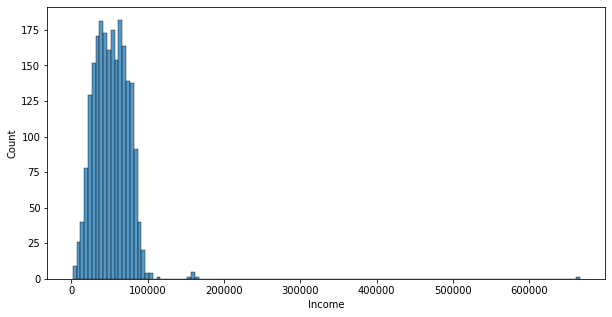

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Income')

Visualizing the Age column

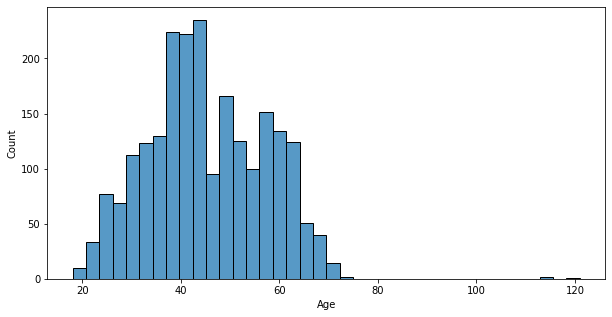

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age')

Setting up the constraints of the Income and Age column

In [ ]:
df = df[df["Income"] <=160000]
df = df[df["Age"] < 100]

Now again visualizing the Age column

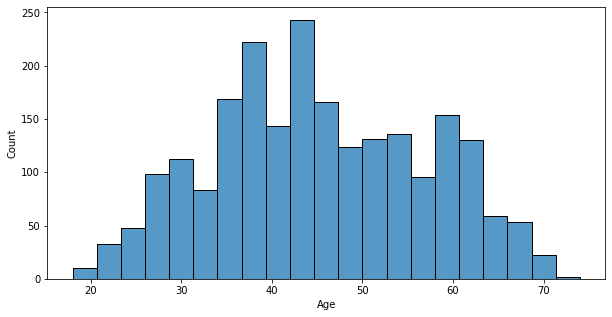

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age')

Now again visualizing the Income column

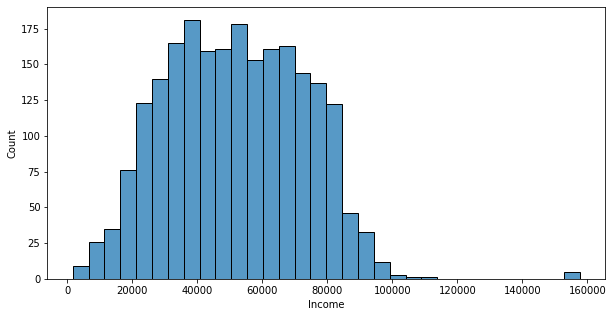

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Income')

Grouping the Education and Income column

In [ ]:
df.groupby("Education")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
PG,853.0,54439.08,19690.53,4023.0,38887.0,53378.0,68092.0,157733.0
UG,1381.0,50273.05,21887.09,1730.0,31907.0,50002.0,68316.0,157146.0


Grouping the Total_campaigns_accepted column and the Income column

In [ ]:
df.groupby("Total_campaigns_accepted")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Total_campaigns_accepted,,,,,,,,
0,1626.0,48202.12,19902.38,1730.0,33256.50,47352.0,63357.00,157733.0
1,369.0,56738.59,20329.79,5648.0,40590.00,58482.0,73691.00,98777.0
2,142.0,61460.20,21562.11,7500.0,46224.75,65320.5,78551.50,96843.0
3,51.0,78462.35,13516.53,37929.0,75519.00,81929.0,85471.50,105471.0
4,36.0,82143.28,11521.92,48192.0,75742.50,82171.5,90253.50,102160.0
5,10.0,86434.40,9316.60,65169.0,84561.25,86727.0,90321.75,102692.0


Importing the LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

We use labelled encoding to the Education column

In [ ]:
label_encoder =LabelEncoder()
# Encode labels in column. 
df['Education']= label_encoder.fit_transform(df['Education'])
df.head(10)

,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Childern_home,Total_spend,Cust_Seniority,Total_campaigns_accepted,Couple
0,1,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,3,11,57,0,1617,Old,1,0
1,1,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,3,11,60,2,27,New,0,0
2,1,Together,71613.0,426,49,127,111,21,42,1,8,2,10,4,3,11,49,0,776,Old,0,1
3,1,Together,26646.0,11,4,20,10,3,5,2,2,0,4,6,3,11,30,1,53,New,0,1
4,0,Together,58293.0,173,43,118,46,27,15,5,5,3,6,5,3,11,33,1,422,New,0,1
5,0,Together,62513.0,520,42,98,0,42,14,2,6,4,10,6,3,11,47,1,716,Old,0,1
6,1,Single,55635.0,235,65,164,50,49,27,4,7,3,7,6,3,11,43,1,590,Old,0,0
7,0,Together,33454.0,76,10,56,3,1,23,2,4,0,4,8,3,11,29,1,169,Old,0,1
8,0,Together,30351.0,14,0,24,3,3,2,1,3,0,2,9,3,11,40,1,46,Old,1,1
9,0,Together,5648.0,28,0,6,1,1,13,1,1,0,0,20,3,11,64,2,49,New,1,1


Dropping the Martial_status column

In [ ]:
df.drop('Marital_Status', axis=1, inplace=True)

Replacing old with 0 and new with 1 in Cust_senority column

In [ ]:
df["Cust_Seniority"] = df["Cust_Seniority"].replace({"Old":0, "New":1})

In [ ]:
df["Cust_Seniority"] = df["Cust_Seniority"].replace({"Old":0, "New":1})

Import standardscaler

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaling the data

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Childern_home,Total_spend,Cust_Seniority,Total_campaigns_accepted,Couple
0,0.785919,0.296469,0.982380,1.553239,1.697617,2.459819,1.474436,0.844820,0.354521,1.407056,2.555950,-0.554042,0.692014,0.0,0.0,1.016010,-1.264686,1.681421,-0.656608,0.619799,-1.346700
1,0.785919,-0.260818,-0.871487,-0.636614,-0.717326,-0.650664,-0.632004,-0.730323,-0.167906,-1.112818,-0.575100,-1.169676,-0.133378,0.0,0.0,1.272384,1.395680,-0.962199,1.522979,-0.502269,-1.346700
2,0.785919,0.933187,0.361453,0.571580,-0.176200,1.343704,-0.147764,-0.038796,-0.690334,1.407056,-0.227206,1.292858,-0.546074,0.0,0.0,0.332345,-1.264686,0.283129,-0.656608,-0.502269,0.742556
3,0.785919,-1.191584,-0.871487,-0.561102,-0.654717,-0.504288,-0.583580,-0.749532,-0.167906,-0.752836,-0.922995,-0.554042,0.279318,0.0,0.0,-1.291357,0.065497,-0.918970,1.522979,-0.502269,0.742556
4,-1.272396,0.303793,-0.390194,0.420556,-0.216449,0.154402,-0.002493,-0.557441,1.399376,0.327110,0.120689,0.061591,-0.133378,0.0,0.0,-1.034983,0.065497,-0.305451,1.522979,-0.502269,0.742556


Dropping the z_costcontact and z_revenue column in the dataset

In [ ]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

Plotting with the heatmap

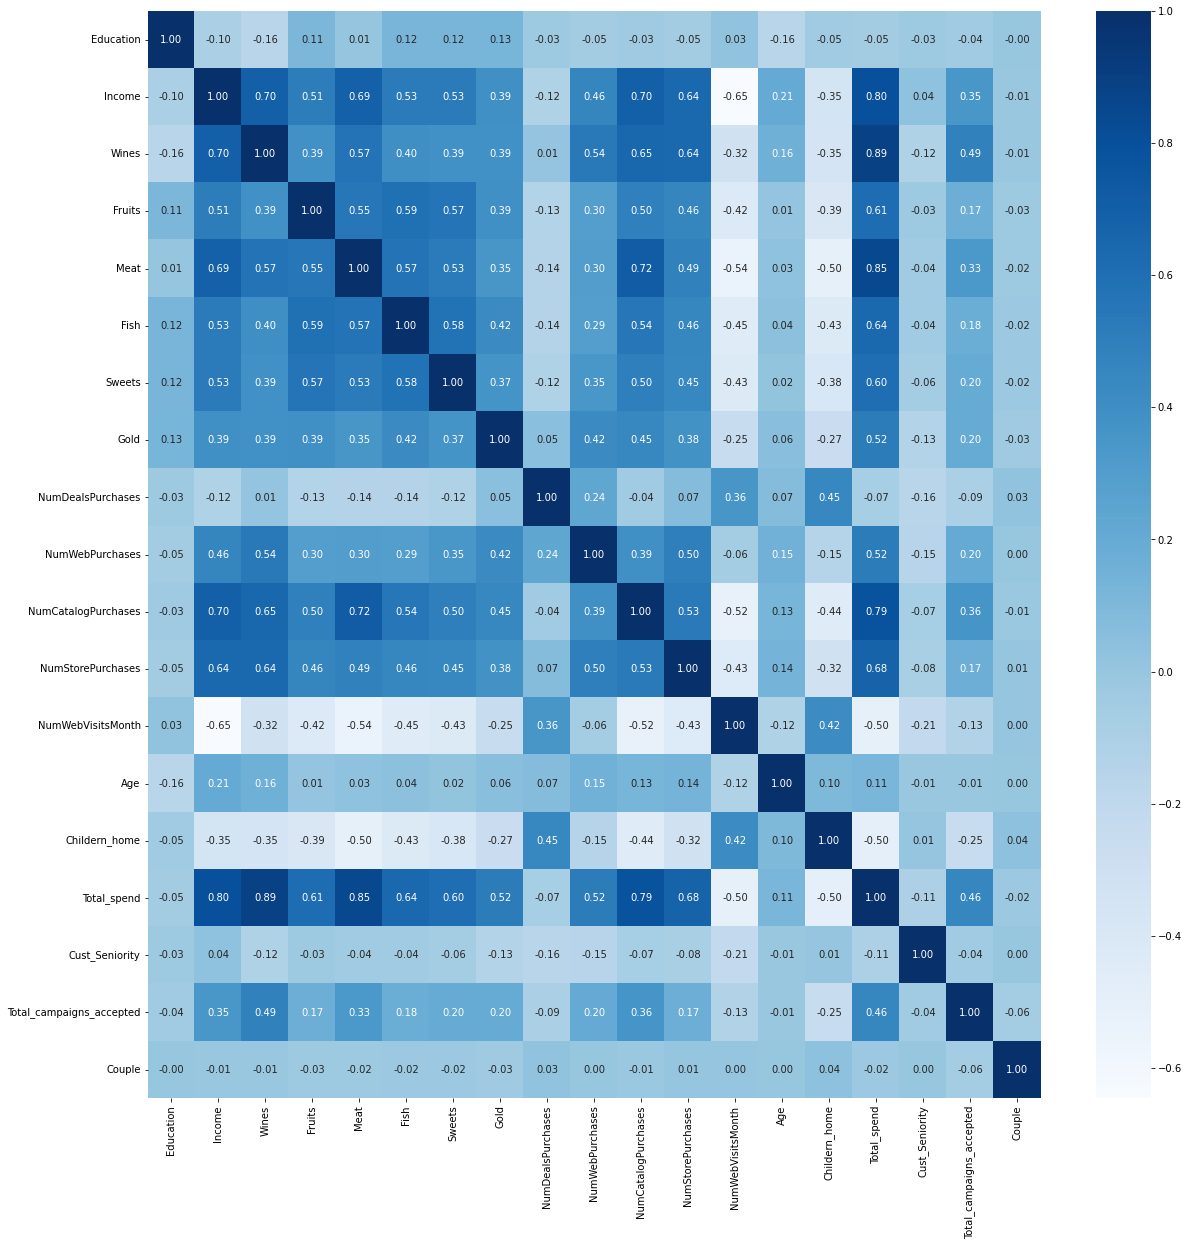

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

Installing KMeans

In [ ]:
!pip install kmeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the KMeans

In [ ]:
from sklearn.cluster import KMeans

Using the Elbow Plot and finding the no of clusters 

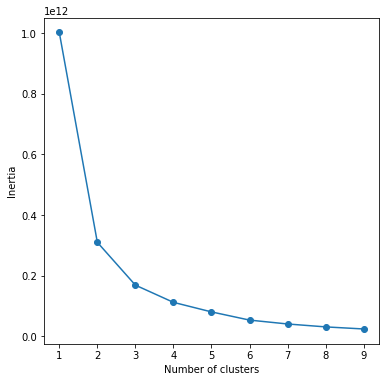

In [ ]:
inertias = []
list_k = list(range(1,10))
for k in list_k:
  km = KMeans(n_clusters=k)
  km.fit(df)
  inertias.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Inertia');
plt.show()

The no of clusters is 4

These are the datasets that should not be dropped

In [ ]:
to_keep = ['Education', 'Income', 'Cust_Seniority', 'Age',
       'Couple', 'Childern_home', 'Total_spend']


In the new column kcluster we keep the columns that is not dropped

In [ ]:
kmeancluster = KMeans(n_clusters=4)
df["kcluster"] = kmeancluster.fit_predict(df[to_keep])

Plotting the bar graph to show the number of clusters

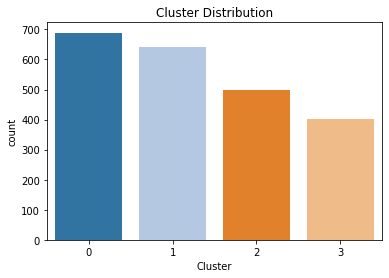

In [ ]:
sns.countplot(data=df, x="kcluster", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.show()

Plotting the clusters for Income and Spending column

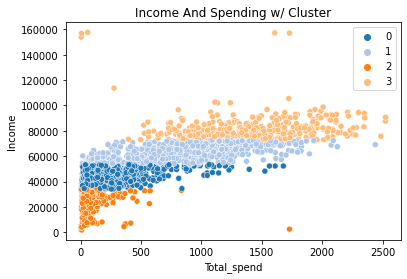

In [ ]:
pl = sns.scatterplot(data = df,x=df["Total_spend"], y=df["Income"],hue=df["kcluster"], palette="tab20")
pl.set_title("Income And Spending w/ Cluster")
plt.legend()
plt.show()

Grouping Kcluster and Income

In [ ]:
df.groupby("kcluster")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,689.0,43511.19,5804.73,33955.0,38410.00,43142.0,48789.00,53378.0
1,642.0,63268.74,5586.20,53537.0,58362.00,63361.5,68110.75,72679.0
2,500.0,24177.36,7082.82,1730.0,19936.75,25304.0,30096.00,33812.0
3,403.0,82325.56,10408.81,72828.0,76713.00,80336.0,84596.00,157733.0


Plotting the clusters for Income and kcluster column

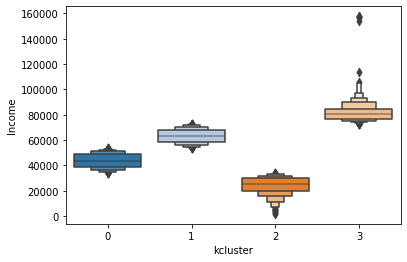

In [ ]:
sns.boxenplot(x=df["kcluster"], y=df["Income"], palette="tab20")
plt.show()

Grouping the kcluster and Total_spend column

In [ ]:
df.groupby("kcluster")["Total_spend"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,689.0,255.47,271.93,8.0,60.00,156.0,369.0,1679.0
1,642.0,880.18,444.01,16.0,545.00,883.0,1177.0,2440.0
2,500.0,77.55,113.15,5.0,31.75,51.5,80.0,1730.0
3,403.0,1422.57,455.00,6.0,1104.50,1428.0,1734.5,2525.0


Plotting the clusters for kcluster and Total_spend column

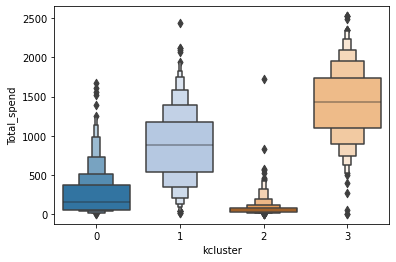

In [ ]:
sns.boxenplot(x=df["kcluster"], y=df["Total_spend"], palette="tab20")
plt.show()

Plotting the Age_bins and kcluster

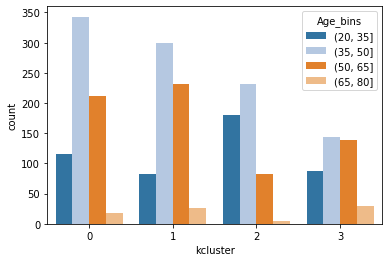

In [ ]:
df["Age_bins"] = pd.cut(df["Age"], bins=[20,35,50,65,80])
sns.countplot(x=df["kcluster"], hue=df["Age_bins"], palette="tab20")
plt.show()

Plotting the Kcluster and Education column

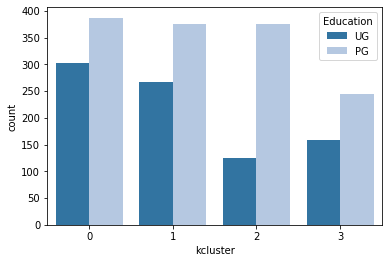

In [ ]:
sns.countplot(data=df, x="kcluster", hue="Education", palette="tab20")
plt.legend(title='Education', labels=['UG','PG'])
plt.show()

Plotting the clusters for kcluster and Children_home column

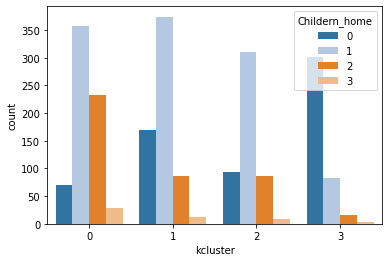

In [ ]:
sns.countplot(data=df, x="kcluster", hue="Childern_home", palette="tab20")
plt.show()

Plotting the clusters for kcluster and Total_campaigns_accepted column

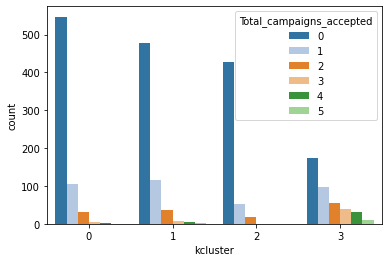

In [ ]:
sns.countplot(data=df, x="kcluster", hue="Total_campaigns_accepted", palette="tab20")
plt.show()

Plotting the clusters for kcluster and cust_senority column

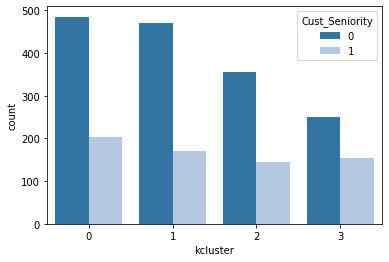

In [ ]:
sns.countplot(data=df, x="kcluster", hue="Cust_Seniority", palette="tab20")
plt.show()

Plotting the clusters for kcluster and Couple column

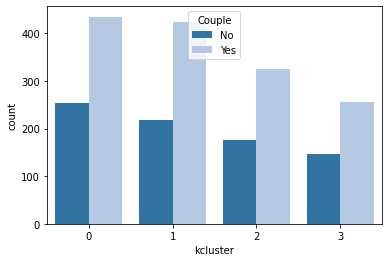

In [ ]:
sns.countplot(data=df, x="kcluster", hue="Couple", palette="tab20")
plt.legend(title='Couple', labels=['No', 'Yes'], loc="upper center")
plt.show()

Plotting the clusters for kcluster and NumWebVisitsMonth column

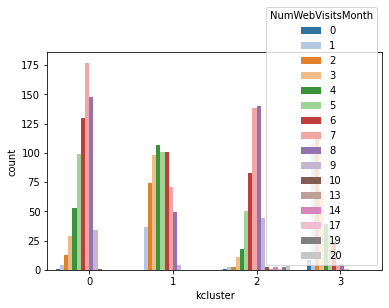

In [ ]:
sns.countplot(data=df, x="kcluster", hue="NumWebVisitsMonth", palette="tab20")
plt.show()

Plotting the clusters for kcluster and Numwebpurchases column

In [ ]:
df.groupby("kcluster")['NumWebPurchases'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,689.0,3.46,2.49,0.0,2.0,3.0,5.0,27.0
1,642.0,5.66,2.53,0.0,4.0,5.0,7.0,11.0
2,500.0,1.98,1.88,0.0,1.0,2.0,2.0,25.0
3,403.0,5.29,2.46,0.0,4.0,5.0,6.5,27.0


Plotting the clusters for kcluster and NumWebPurchases column

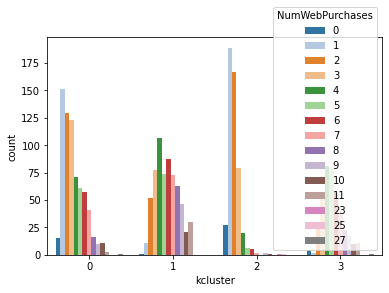

In [ ]:
sns.countplot(data=df, x="kcluster", hue="NumWebPurchases", palette="tab20")
plt.show()